# Let's Face It 

**Team Members:** Georgiy Sekretaryuk, Rafael Arbex-Murut, Yeshwanth Somu

**Data Set:** Facial Recognition Dataset
- https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset?select=Testing

**Data Set Description:**

This dataset contains folders pertaining to different expressions of the human face, such as Surprise, Anger, Happiness, Sad, Neutral, Fear. The training set consists of 28,079 samples in total with the testing set consisting of 7,178 samples in total. The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The purpose of this project is to analyze facial images to predict emotion.

**Number of Attributes:** 2304

**Attribute Description:** Each attribute is a grayscale value of each of the 48 x 48 pixels.

**Data Source:** Kaggle

In [2]:
# SETUP

import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn import metrics
tf.get_logger().setLevel('INFO')

### Loading Data

In [3]:
# Function to load images from a folder
def load_images_from_folder(folder_path, label_mapping):
    images = []
    labels = []

    #load each image file
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))

        #check if loaded properly
        if img is not None:

            images.append(np.array(img)) #turn image to array
            folder_name = folder_path.split('/')[-1]  # Extract folder name from path
            label = label_mapping[folder_name]  # Assign label based on folder name
            labels.append(label)  # Assign the folder index as the label

    return images, labels

def load_dataset(data_folder, return_label_names=False):
    X = []
    Y = []

    label_mapping = {}  # Dictionary to map folder names to label values
    label_counter = 0

    #cycle through each folder, get folder path
    for folder_name in os.listdir(data_folder):
        folder_path = os.path.join(data_folder, folder_name)
        # print("Load_dataset is looping through", folder_path)

        #check if a folder or a stray file
        if os.path.isdir(folder_path):

            #count folders to assign index
            label_mapping[folder_name] = label_counter
            label_counter += 1

            #load images and labels, add to X/Y list
            images, labels = load_images_from_folder(folder_path, label_mapping)
            X.extend(images)
            Y.extend(labels)
    
        else:
            print(f"{folder_path} is not a folder.")

    #pull out label names
    label_names = list(label_mapping.keys())

    if return_label_names:
        label_names = list(label_mapping.keys())
        return np.array(X), np.array(Y), label_names
    else:
        return np.array(X), np.array(Y)

# Load the training dataset
train_folder = 'data/Training/Training'
X_train, Y_train, label_names = load_dataset(train_folder, return_label_names=True)

# Load the testing dataset
test_folder = 'data/Testing/Testing'
X_test, Y_test, = load_dataset(test_folder)

# Flatten the label vectors
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()


data/Testing/Testing/.DS_Store is not a folder.


In [4]:
print("X_train.shape:", X_train.shape)
print("Y_train.shape:", Y_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_test.shape:", Y_test.shape)

print(label_names)

print(Y_train)

X_train.shape: (28273, 48, 48)
Y_train.shape: (28273,)
X_test.shape: (7067, 48, 48)
Y_test.shape: (7067,)
['Happy', 'Sad', 'Fear', 'Neutral', 'Angry', 'Suprise']
[0 0 0 ... 5 5 5]


In [5]:
X_train = X_train / 255
X_test = X_test / 255

### Visualizing Images in Dataset

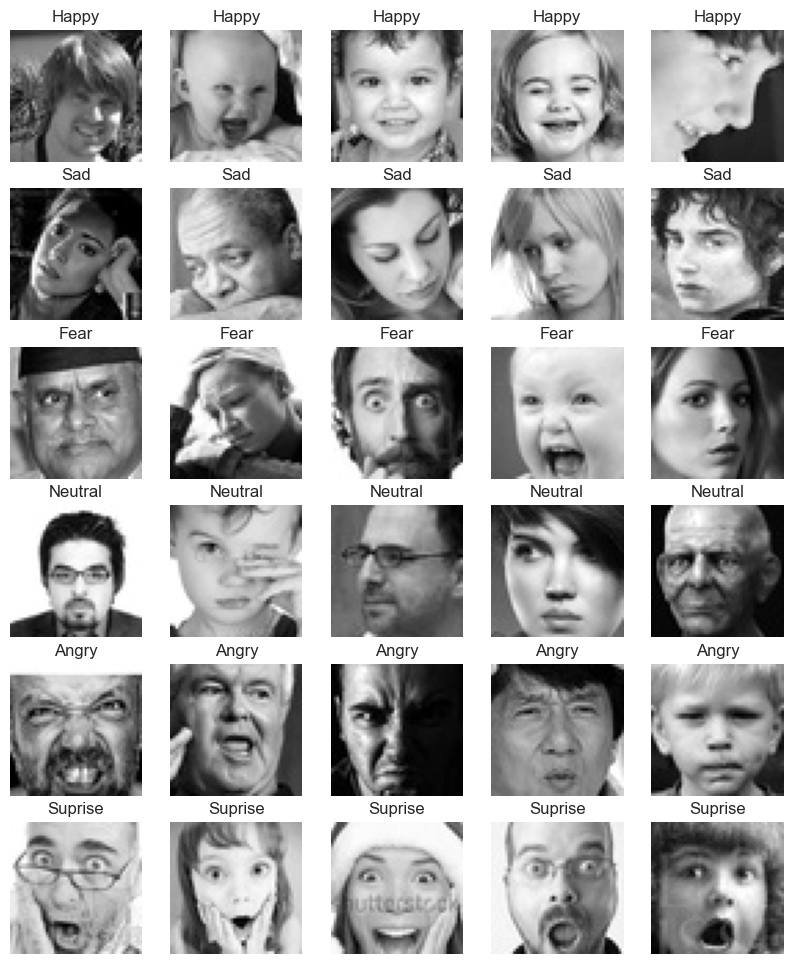

In [6]:
#plot 5 images for each label

num_images_to_show = 5

fig, axs = plt.subplots(len(label_names), ncols=num_images_to_show, figsize=(10, 12))
for label in range(len(label_names)):
    counter = 0 
    for i in range(len(Y_train)):
        if Y_train[i] == label:
            image = X_train[i]
            axs[label, counter].imshow(image, cmap='gray')
            axs[label, counter].set_title(label_names[label])
            axs[label, counter].axis('off')
            counter += 1

            #if loaded 5 images per row/label, break
            if counter == 5:  
                break
plt.show()

### Building the Model

In [7]:
# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train = X_train[shuffled_indices]
Y_train = Y_train[shuffled_indices]

In [16]:
def build_model(n_classes, learning_rate=0.01):
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=128, activation='relu'))
    model.add(keras.layers.Dense(units=72, activation='relu'))
    model.add(keras.layers.Dense(units=48, activation='relu'))
    model.add(keras.layers.Dense(units=n_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    
    return model

Epoch 1/5
398/398 [==============================] - 4s 8ms/step - loss: 1.7461 - accuracy: 0.2560 - val_loss: 1.7146 - val_accuracy: 0.2843
Epoch 2/5
398/398 [==============================] - 3s 8ms/step - loss: 1.6979 - accuracy: 0.2931 - val_loss: 1.6605 - val_accuracy: 0.3306
Epoch 3/5
398/398 [==============================] - 3s 7ms/step - loss: 1.6581 - accuracy: 0.3272 - val_loss: 1.6354 - val_accuracy: 0.3281
Epoch 4/5
398/398 [==============================] - 3s 7ms/step - loss: 1.6319 - accuracy: 0.3418 - val_loss: 1.6067 - val_accuracy: 0.3596
Epoch 5/5
398/398 [==============================] - 3s 7ms/step - loss: 1.6159 - accuracy: 0.3496 - val_loss: 1.6005 - val_accuracy: 0.3575


,loss,accuracy,val_loss,val_accuracy
0,1.746051,0.256042,1.714608,0.284300
1,1.697853,0.293103,1.660462,0.330622
2,1.658126,0.327216,1.635355,0.328147
3,1.631851,0.341796,1.606680,0.359618
4,1.615929,0.349578,1.600538,0.357496


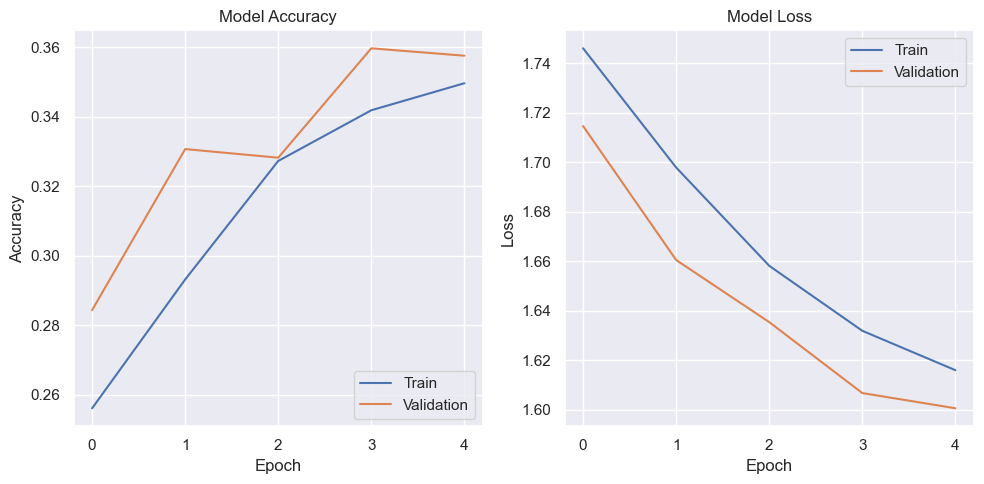

In [21]:
model = build_model(len(label_names), 0.01)


model_history = model.fit(
  x=X_train,
  y=Y_train,
  epochs=5,
  batch_size=64,
  validation_split=0.1,
  verbose=1
)

history_df = pd.DataFrame(model_history.history)
display(history_df)

# Plot the training and validation curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [10]:
test_predictions = np.argmax(model.predict(X_test), axis=-1)
print(test_predictions)

221/221 [==============================] - 1s 3ms/step
[0 0 0 ... 0 5 5]


      0    1   2    3    4    5
0  1443  162  16   76   47   30
1   525  364  44  190   92   32
2   435  190  87  165   72   75
3   585  176  30  359   48   35
4   457  162  54  120  130   35
5   252   69  64   78   31  337


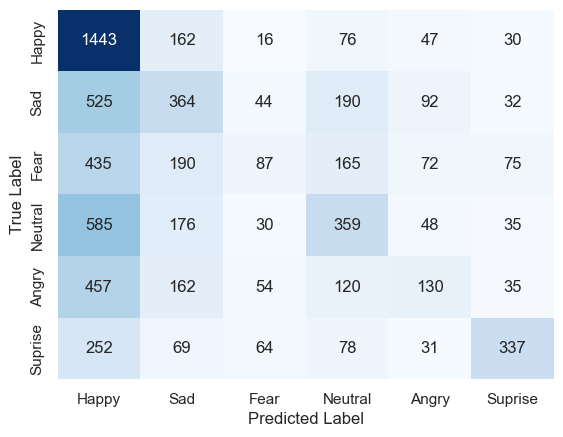

              precision    recall  f1-score   support

           0      0.390     0.813     0.528      1774
           1      0.324     0.292     0.307      1247
           2      0.295     0.085     0.132      1024
           3      0.363     0.291     0.323      1233
           4      0.310     0.136     0.189       958
           5      0.619     0.406     0.490       831

    accuracy                          0.385      7067
   macro avg      0.384     0.337     0.328      7067
weighted avg      0.376     0.385     0.345      7067



In [11]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(Y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.4g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

print(pd.DataFrame(confusion_matrix))
# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

print(metrics.classification_report(Y_test, test_predictions, digits=3))